# @Holger Elias Rivera Espinola
# PROGRAMA DE RECONHECIMENTO DE PADRÕES
# CLASSIFICAÇÃO - REGRESSÃO LOGÍSTICA
-----------------------------------------------------------------------------------------------

# PROBLEMA 02: CLASSIFICAÇÃO LINEAR - BRACA2 VS OUTROS

Os dados são provenientes do dataset data_breast_cancer.csv, contêm 3226 variáveis (genes) e 22 amostras (pacientes), das quais 7 amostras são da classe BRACA1, 8 da classe BRACA2 e 7 da classe SPORADIC

1) Carregar os dados do arquivo .csv e lê-os em um dataset.

In [2]:
#leitura dos dados do arquivo csv
from csv import reader
#carregamento dos dados do arquivo csv
def load_csv(filename):
    file=open(filename,"r")
    lines=reader(file)
    dataset=list(lines)
    return dataset
#executar leitura do arquivo csv
filename='data_breast_cancer.csv'
dataset=load_csv(filename)
print('Dados carregados arquivo {0} com #filas: {1} e #colunas: {2}'.format(filename,len(dataset),len(dataset[0])))

Dados carregados arquivo data_breast_cancer.csv com #filas: 3228 e #colunas: 23


2)	Criar um dataset para o problema 2 que tenha a seguinte forma:

![Home](Untitled Folder/ty1.jpg)

In [3]:
#seleção dos dados para o problema 2
datasetp2=[]
j1=0
for j in range(1,len(dataset[0])):
    if dataset[-1][j]=='BRACA2': #braca2
        datasetp2.insert(j1,[dataset[i][j] for i in range(1,len(dataset))])
        datasetp2[j1][-1]=0
        j1=j1+1
    else: #outros
        datasetp2.insert(j1,[dataset[i][j] for i in range(1,len(dataset))])
        datasetp2[j1][-1]=1
        j1=j1+1

#vista dos dados
print(datasetp2)

[['0.15', '1.54', '1.72', '0.71', '0.94', '0.8', '0.78', '0.27', '1.84', '0.82', '1.78', '0.59', '2.17', '0.62', '1.05', '1.69', '1.12', '0.87', '0.7', '1.31', '0.29', '0.66', '1.43', '0.67', '0.51', '1.05', '1.53', '0.99', '2.87', '0.72', '0.52', '1.23', '1.34', '1.73', '1.34', '0.54', '0.81', '0.93', '1.68', '2.37', '2.05', '0.36', '0.91', '0.67', '1.09', '4.57', '0.39', '0.56', '0.6', '1.89', '0.87', '2.45', '0.29', '3.76', '3.62', '4.8', '1.42', '0.56', '0.69', '1.46', '1.71', '0.75', '2.03', '1.25', '0.58', '0.26', '1.04', '0.72', '0.56', '1.09', '1.01', '0.62', '1.24', '0.55', '2.32', '1.29', '0.63', '1.88', '0.66', '0.61', '0.27', '0.54', '0.78', '1.67', '0.94', '1.76', '1.94', '1.98', '1.3', '0.33', '0.56', '1.91', '0.35', '1.24', '1.04', '1.93', '1.16', '1.34', '1.59', '1.12', '3.59', '2.1', '2.02', '1.56', '1.06', '0.39', '1.45', '0.54', '0.38', '0.85', '0.83', '0.89', '2.33', '3.86', '0.93', '1.6', '0.52', '1.43', '0.73', '0.57', '1.12', '0.9', '0.19', '0.33', '1.52', '1.19'

3) Criar uma lista que tenha os dados para uma variável gene com 2 sublistas uma para a classe 0 (braca2) 
   e outra para a classe 1(outros).

In [4]:
#criacao do x1 (braca2) e x2 (outros)
def braca2_outros(gene):
    lbraca=[]
    braca2=[]
    outros=[]
    ib1=0
    ib2=0
    for i in range(len(datasetp2)):
        if datasetp2[i][-1]==0:  #carateristica pertence a braca1
            braca2.insert(ib1,float(datasetp2[i][gene]))
            ib1=ib1+1
        else: #carateristica pertence a braca2
            outros.insert(ib2,float(datasetp2[i][gene]))
            ib2=ib2+1
    lbraca.insert(0,braca2)
    lbraca.insert(1,outros)
    return lbraca

#exemplo: para gene 0 e 1
print(braca2_outros(0))
print(braca2_outros(1))

[[0.35, 1.1, 1.07, 1.46, 0.7273, 0.6338, 0.7677, 0.6594], [0.15, 0.22, 0.3, 0.26, 1.22, 0.44, 0.36, 0.57, 0.31, 0.48, 0.4, 0.25, 0.44, 0.38]]
[[0.9, 0.64, 0.78, 0.55, 0.7056, 0.2994, 0.6221, 0.9987], [1.54, 1.27, 0.76, 0.85, 1.27, 0.64, 1.02, 0.39, 1.39, 0.83, 1.02, 0.61, 1.53, 0.61]]


4) Criando os vetores Sn por cada combinação de pares de genes:

![Home](Untitled folder/tx2.jpg)

In [5]:
#criacao do sn={[(gene_a)i,(gene_b)i],yi}
def criar_sn(genea,geneb):
    sn=[]
    x=[]
    y=[]
    x=braca2_outros(genea)
    y=braca2_outros(geneb)
    for i in range(0,len(x[0])):
        sn.insert(i,[x[0][i],y[0][i],0])
    for i in range(0,len(x[1])):
        sn.insert((len(x[0]))+i,[x[1][i],y[1][i],1])
    return sn

#exemplo: criar um sn para genes 0 e 1
print(criar_sn(0,1))

[[0.35, 0.9, 0], [1.1, 0.64, 0], [1.07, 0.78, 0], [1.46, 0.55, 0], [0.7273, 0.7056, 0], [0.6338, 0.2994, 0], [0.7677, 0.6221, 0], [0.6594, 0.9987, 0], [0.15, 1.54, 1], [0.22, 1.27, 1], [0.3, 0.76, 1], [0.26, 0.85, 1], [1.22, 1.27, 1], [0.44, 0.64, 1], [0.36, 1.02, 1], [0.57, 0.39, 1], [0.31, 1.39, 1], [0.48, 0.83, 1], [0.4, 1.02, 1], [0.25, 0.61, 1], [0.44, 1.53, 1], [0.38, 0.61, 1]]


5) Função Linear

Dada para uma função linear o vetor de coeficientes $w=(b,w_1,w_2)$ e o vetor de pontos $x=(x_1,x_2)$, o valor da função linear se obtém pela equação: 
$$f(w,x)=b+w_1\cdot x_1+w_2\cdot x_2 $$

In [6]:
#funcao linear: f(w,x)=b+w1*x1+w2*x2
def linear(coef,ponto):
    soma=coef[0]
    for i in range(len(ponto)):
        soma=soma+coef[i]*ponto[i]
    return soma

6) Função Sigmoide: 

Função básica que devolve valores entre 0 e 1, assegurando que os valores obtidos representam de fato uma probabilidade.
$$s(z) = \frac{1}{1 + e^{-z}}$$


In [7]:
#funcao sigmoide: s(z)=1/(1+exp(-z))
def sigmoide(z):
    from math import exp
    from math import fabs
    if fabs(z)>0 and fabs(z)<1e-3:
        z=z/fabs(z)*1e-3
    if fabs(z)>100:
        z=z/fabs(z)*100
    return 1.0/(1+exp(-z))

7)	Função Probabilidade

Dado os coeficientes de um classificador linear e um ponto, calculamos a probabilidade de ocorrência dos pontos:
$$h([b,w_1,w_2],[x_1,x_2])=\frac{1}{1 + e^{-(b+w_1\cdot x_1+w_2\cdot x_2)}}$$

In [8]:
#funcao probabilidade: h([b,w1,w2],[x1,x2])=1/(1+exp(-(b+w1*x1+w2*x2)))
def probabilidade(coef,ponto):
    z=linear(coef,ponto)
    return sigmoide(z)

8) Função ganho

Dado um conjunto de treinamento $S_n=\{(x_1,y_1),\ldots,(x_n,y_n)\}$ e os coeficientes de uma função linear  $w=(b,w_1,w_2)$,
a função ganho está definida como a função likelihood:

$$J([b,w_1,w_2],S_n)=\sum_{i=1}^{n}y_{i}log(h([b,w_1,w_2],[x_1,x_2]_{i})) + (1-y_{i})log(1-h([b,w_1,w_2],[x_1,x_2]_{i}))$$

In [9]:
#funcao ganho: J([b,w1,w2],Sn)=sum( (yi*log(h([b,w1,w2],[x1,x2]))) + ((1-yi)*log(1-h([b,w1,w2],[x1,x2]))) ), i=i...n
def ganho(coef,sn):
    from math import log
    soma=0
    for x_y in sn:
        ponto=[0,x_y[0],x_y[1]]
        classe=x_y[2]
        p=probabilidade(coef,ponto)
        if p<1e-20:
            p=1e-20
        if (1-p)<1e-10:
            p=1-(1e-10)
        soma=soma+(classe*log(p))+((1-classe)*log(1-p))
    return soma

9) Gradiente descendente

A gradiente para $J([b,w_1,w_2],S_n)$ é o vetor:
$$\nabla J=\left(\frac{\partial J([b,w_1,w_2],S_n)}{\partial b}, \frac{\partial J([b,w_1,w_2],S_n)}{\partial w_1},  \frac{\partial J([b,w_1,w_2],S_n)}{\partial w_2}\right)$$

$$\frac{\partial J([b,w_1,w_2],S_n)}{\partial b}=\sum_{i=1}^{n}(y_i-h\left([b,w_1,w_2],[x_1,x_2]_{i})\right)$$

$$\frac{\partial J([b,w_1,w_2],S_n)}{\partial w_1}=\sum_{i=1}^{n}(y_i-h\left([b,w_1,w_2],[x_1,x_2]_{i})\right)\cdot [x_1]_{i}$$

$$\frac{\partial J([b,w_1,w_2],S_n)}{\partial w_2}=\sum_{i=1}^{n}(y_i-h\left([b,w_1,w_2],[x_1,x_2]_{i})\right)\cdot [x_2]_{i}$$

 A gradiente descendente se obtêm com o seguinte método:

 1. Obter o primeiro classificador linear  $(b,w_1,w_2)_0$ de forma aleatoria.
 2. Computar $\Delta b= \frac{\partial J([b,w_1,w_2]_0,S_n)}{\partial b}$
 3. Computar $\Delta w_1= \frac{\partial J([b,w_1,w_2]_0,S_n)}{\partial w_1}$
 4. Computar $\Delta w_2= \frac{\partial J([b,w_1,w_2]_0,S_n)}{\partial w_2}$
 5. Atualizar $(b,w_1,w_2)_1 = (b,w_1,w_2)_0+ \gamma(\Delta b, \Delta w_1, \Delta w_2)$
 6. O $(b,w_1,w_2)_0$ se converte em $(b,w_1,w_2)_1$
 7. Repetir o processo 2 ao 6 até convergir


In [10]:
#funcao gradiente descendente
def gradiente(coef,sn):
    learning_rate=[10000,1000,100,10,5,3,2,1,0.5,0.3,0.1,0.03,0.01,0.003,0.001,0.0003,0.0001,3e-5,1e-5]
    current_value=ganho(coef,sn)
    delta_b=0
    delta_w1=0
    delta_w2=0
    for x_y in sn:
        ponto=[0,x_y[0],x_y[1]]
        classe=x_y[2]
        prob=probabilidade(coef,ponto)
        delta_b=delta_b+(classe-prob)
        delta_w1=delta_w1+(classe-prob)*ponto[1]
        delta_w2=delta_w2+(classe-prob)*ponto[2]
    real_rate=0
    for rate in learning_rate:
        after_value=ganho([(coef[0]+rate*delta_b),(coef[1]+rate*delta_w1),(coef[2]+rate*delta_w2)],sn)
        if after_value>current_value:
            real_rate=rate
            break;
    coef[0]=coef[0]+rate*delta_b
    coef[1]=coef[1]+rate*delta_w1
    coef[2]=coef[2]+rate*delta_w2
    return coef


10)	Obtenção dos coeficientes com o menor ganho possível

In [34]:
#funcao para obter os coeficientes otimizados [b*,w*]
def gradiente_learning(coef,sn):
    current_value=ganho(coef,sn)
    coef=gradiente(coef,sn)
    after_value=ganho(coef,sn)
    precisao=0
    while current_value<after_value and (abs(current_value-after_value)<1e-5 or precisao<50):
        current_value=after_value
        coef=gradiente(coef,sn)
        after_value=ganho(coef,sn)
        precisao=precisao+1
    return coef

#exemplo: obter os coef otimizados para genes 0 e 1
coefx=[1,1,1]
snx=criar_sn(0,1)
coefx=gradiente_learning(coefx,snx)
print(coefx)
print(ganho(coefx,snx))

[0.6534273801300886, -4.669233108354452, 3.384988161258872]
-8.764665325556532


11)	Lista de ganhos por cada combinação de genes.

![Home](Untitled Folder/tx6.jpg)

In [35]:
#funcao para criar lista de ganhos
def lista_ganhos(datasetp2):
    k=0
    lganhos=[]
    for i in range(0,99): 
        for j in range(i+1,100):
            coef=[1,1,1]
            sn=[]
            sn=criar_sn(i,j)
            coef=gradiente_learning(coef,sn)
            lganhos.insert(k,[i,j,round(ganho(coef,sn),4),coef])
            k=k+1
    return lganhos

#verificando a lista de ganhos para todas as combinacoes dos 
#100 primeiros pares de genes
lg=[]
lg=lista_ganhos(datasetp2)
print(lg)

[[0, 1, -8.7647, [0.6534273801300886, -4.669233108354452, 3.384988161258872]], [0, 2, -10.1121, [3.012015168120411, -3.7383059693826954, -0.21893520733386576]], [0, 3, -7.3993, [5.095981749763491, -2.812936601242646, -1.6600190814855516]], [0, 4, -9.0595, [5.2907811516993695, -4.777712512325997, -1.484160322218429]], [0, 5, -10.0562, [3.3639671378772853, -4.606902379176119, -0.1493931164666463]], [0, 6, -9.9556, [4.104008698793435, -4.770149187078397, -0.7513430956792317]], [0, 7, -8.2324, [0.6241081370852182, -4.588708463195061, 6.414462448813595]], [0, 8, -9.568, [1.5235430817569635, -4.397981117560967, 1.3277291030939393]], [0, 9, -9.1524, [1.449820973487966, -4.098675239687068, 2.872604811751219]], [0, 10, -7.9942, [5.720676730948419, -4.338145218922577, -2.6629318630353502]], [0, 11, -8.177, [-0.47594512115119564, -3.7240108431295895, 5.207608864527345]], [0, 12, -10.0732, [2.817550507260162, -4.468921700489259, 0.21401043575095527]], [0, 13, -9.5182, [4.586934936466867, -4.569065

12)	Escolher os 10 melhores ganhos e identificar os genes dos quais pertencem

In [40]:
#funcao para ordenar e escolher top10
def select_top10(lganhos):
    top10=[]
    lganhos.sort(reverse=True,key=lambda x:x[2])
    for i in range(0,10):
        top10.insert(i,lganhos[i])
    return top10

#obtendo a lista dos 10 melhores
best10x=[]
best10x=select_top10(lg)
print(best10x)

[[28, 36, -0.0, [-2520.669604998824, 2901.3061233097733, -1790.6377809812793]], [10, 28, -2.6968, [-5.692022683745238, -13.94018346098255, 11.67444197688977]], [28, 87, -2.7247, [-5.997231550509695, 8.5591014646704, -3.401174167548261]], [28, 88, -2.935, [-5.162118202007825, 7.679815434015274, -3.353031148731845]], [28, 78, -3.0917, [-5.264968626011337, 12.51824601584084, -13.481850912973648]], [3, 28, -3.1809, [-4.0015913572431305, -4.58009800138051, 8.557042276461646]], [8, 94, -3.2972, [1.0881369478183505, 4.873856138719313, -1.774327028411304]], [28, 37, -3.4007, [-9.699220919243821, 19.951596192632344, -20.070035648227243]], [8, 87, -3.5082, [1.637151948218557, 8.595764600555544, -6.402409152952215]], [0, 34, -3.5766, [10.677237625540684, -4.038431191269208, -5.502857699904654]]]


13)	Criar reta a partir dos coeficientes otimizados na equação

In [37]:
#funcao para criar uma reta
def gerar_reta(coef,sn):
    r=[]
    x=[i for i in range(0,4)]
    y=[-(coef[0]/coef[2])-(coef[1]/coef[2])*a for a in x]
    r.insert(0,x)
    r.insert(1,y)
    return r

#exemplo: obter a reta apartir dos coef otimizados para genes 0 e 1
print(gerar_reta(coefx,snx))

[[0, 1, 2, 3], [-0.1930368287867453, 1.1863573923788528, 2.565751613544451, 3.9451458347100488]]


14)	Criar relatório da gráfica com os pontos e a reta de coeficientes otimizados

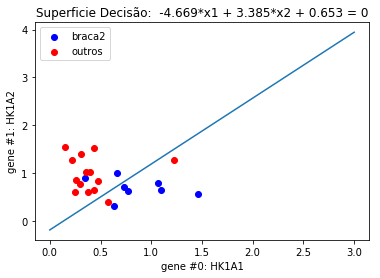

In [38]:
#criar relatorio de gráfica com os pontos e a reta de coef otimizados
import matplotlib.pyplot as plt
%matplotlib inline

def relatorio(coef,sn,genea,geneb):
    plt.xlabel("gene #"+str(genea)+": "+dataset[genea+1][0])
    plt.ylabel("gene #"+str(geneb)+": "+dataset[geneb+1][0])
    plt.title("Superficie Decisão:  "+str(round(coef[1],3))+"*x1 + "+str(round(coef[2],3))+"*x2 + "+str(round(coef[0],3))+" = 0")
    x=[]
    y=[]
    r=gerar_reta(coef,sn)
    x=braca2_outros(genea)
    y=braca2_outros(geneb)
    a1=plt.scatter(x[0],y[0],c='b')
    a2=plt.scatter(x[1],y[1],c='r')
    plt.legend((a1,a2),("braca2","outros"))
    plt.plot(r[0],r[1])

#exemplo: gerar a gráfica para os genes 0 e 1
relatorio(coefx,snx,0,1)

15) Obter iterativamente o relatório dos 10 melhores pares de genes (ou seja os que geram os melhores valores na função ganho)

[[28, 36, -0.0, [-2520.669604998824, 2901.3061233097733, -1790.6377809812793]], [10, 28, -2.6968, [-5.692022683745238, -13.94018346098255, 11.67444197688977]], [28, 87, -2.7247, [-5.997231550509695, 8.5591014646704, -3.401174167548261]], [28, 88, -2.935, [-5.162118202007825, 7.679815434015274, -3.353031148731845]], [28, 78, -3.0917, [-5.264968626011337, 12.51824601584084, -13.481850912973648]], [3, 28, -3.1809, [-4.0015913572431305, -4.58009800138051, 8.557042276461646]], [8, 94, -3.2972, [1.0881369478183505, 4.873856138719313, -1.774327028411304]], [28, 37, -3.4007, [-9.699220919243821, 19.951596192632344, -20.070035648227243]], [8, 87, -3.5082, [1.637151948218557, 8.595764600555544, -6.402409152952215]], [0, 34, -3.5766, [10.677237625540684, -4.038431191269208, -5.502857699904654]]]


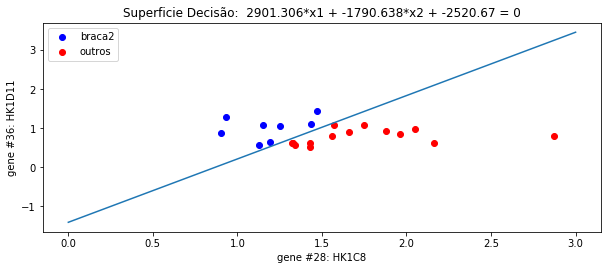

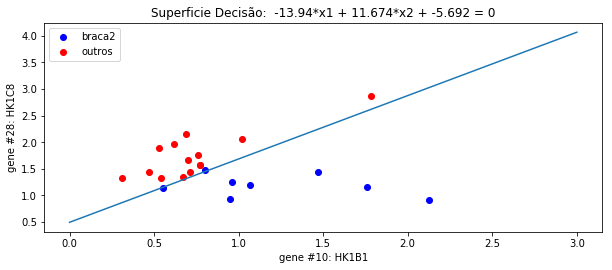

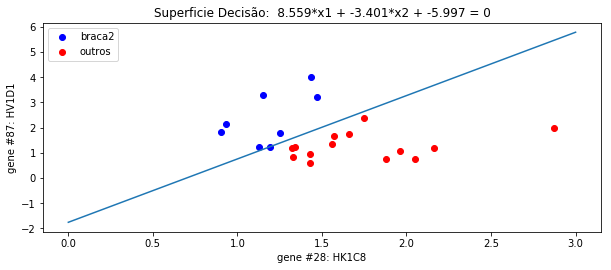

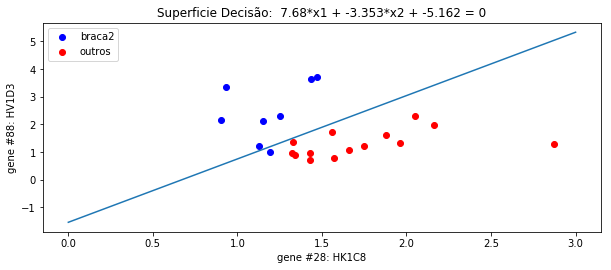

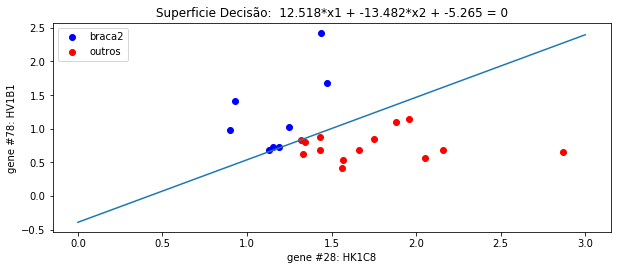

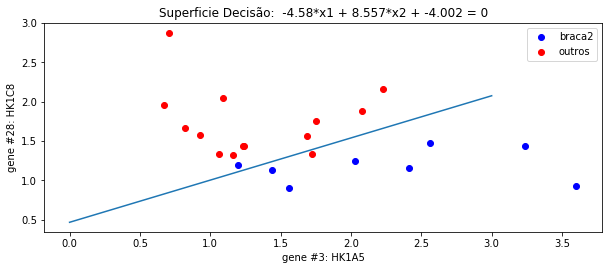

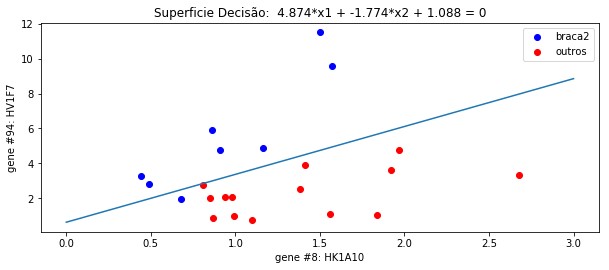

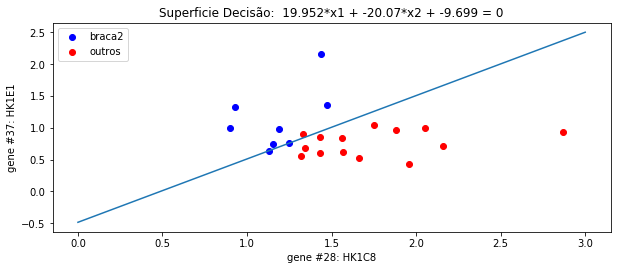

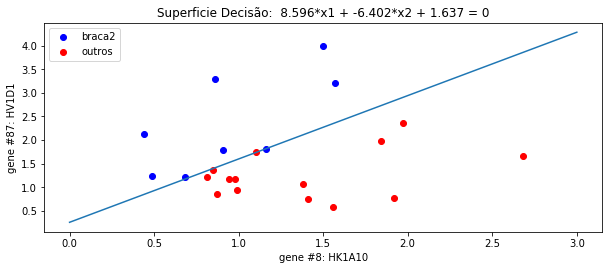

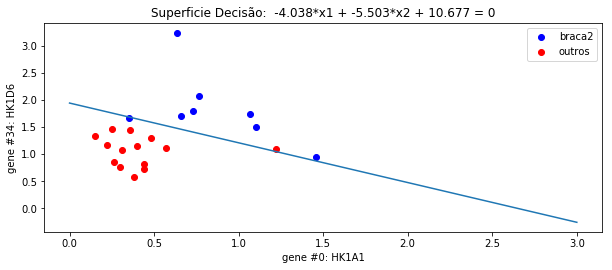

In [39]:
#gerar iterativamente os relatorios para o top10 dos valores de ganho
def relatorio_top10(best10):
    for i in range(1,11):
        plt.figure(i,figsize=(10,50))
        plt.subplot(11,1,i)
        relatorio(best10x[i-1][3],criar_sn(best10x[i-1][0],best10x[i-1][1]),best10x[i-1][0],best10x[i-1][1])

#imprimir relatorio dos 10 melhores
relatorio_top10(best10x)
print(best10x)